In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import scipy 
import seaborn as sns

#### DATA CLEANING

In [3]:
#read the CSV file into a DataFrame
data = pd.read_csv('hhpub17_cleaned.csv')
data.head()  

,UNIQUEID,REGION,STATE,PERCENTILE,TOP5PCT,HHNUMBR,AGES5TO18,pctPopulation,LIVINGQRTS,TENURETYPE,...,pctRNTval,pctSSIval,pctSSval,pctSURval,pctUCval,pctVETval,pctWCval,pctTotal,pctPopPercent,HTOTVAL
0,30396520167020905011,1,23,4,2,2,1,0.001458,1,0,...,0.0,0.0,1.00,0.0,0.0,0.00,0.0,1.0,0.50,18899
1,33562090679100205011,1,23,5,2,2,0,0.001458,1,0,...,0.0,0.0,0.92,0.0,0.0,0.08,0.0,1.0,0.50,26299
2,98133801512065006011,1,23,10,2,4,1,0.002915,1,1,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,1.0,0.25,53400
3,18851203013690506011,1,23,16,2,2,0,0.001458,1,1,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,1.0,0.50,106014
4,20515061200937606111,1,23,10,2,4,1,0.002915,1,0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,1.0,0.25,52901


<!-- COLUMN 	COLUMN DESCRIPTION	NOTES
H_IDNUM	Unique Household Identiter 	
GEREG	Region 	State column was missing significant amount of data.  Had to use Region. 
HEFAMINC	Household Earnings based on screener question	Based on initial Screener question
H_NUMPER	Number of Persons in household 	
HH5TO18	Number of Children in household 	Ages 5 to 18 (Part of H_NUMPER Column)
HHINC	Household Income	Total household income - recode
HPCTCUT	Household Income Percentiles	
HEARNVAL	Household Earnings 	Based on NEW System Enhancements
HOIVAL	Other Income 	Foster care, alimony, jury duty, armed forces reserves, severance pay, hobbies, or any other source
HOTHVAL	Other Income 2	All other types of income except HEARNVAL & HOIVAL
HENGVAL	Engery Assistance 	Altogether, how much energy assistance has been received during, 20..?
HFDVAL	Food Stamps	What was the value of all food stamps received during 20..?
HPRES_MORT	Mortage Flag	Presence of a Mortgage 
H_TENURE	Type Of Tenure 	Rent or Own 
HPROP_VAL	Property Value 	Estimate of current property value
HH_HI_UNIV	Household imputation status	1 -- all HH members reported data.  2 -- some members reported data.  3 --  no members reported data 
 -->

In [4]:
#check for null or missing values
missing_values = data.isnull().sum()
filtered_missing_values = missing_values[missing_values != 0]
print("Count of Missing Values (Not equal to 0):")
print(filtered_missing_values)


Count of Missing Values (Not equal to 0):
Series([], dtype: int64)


In [5]:
data.shape 

(1275, 39)

Columns are broken down into: 
    
    1. State / Region Locations
    2. Number of Persons in Household 
    3. Housing Types
    4. Income (Earnings & Others)
    5. Income Percentiles
    6. Energy Assistance & Food Stamps 

#### EXPLORATORY ANALYSIS

In [6]:
target_variable = 'pctPopPercent'

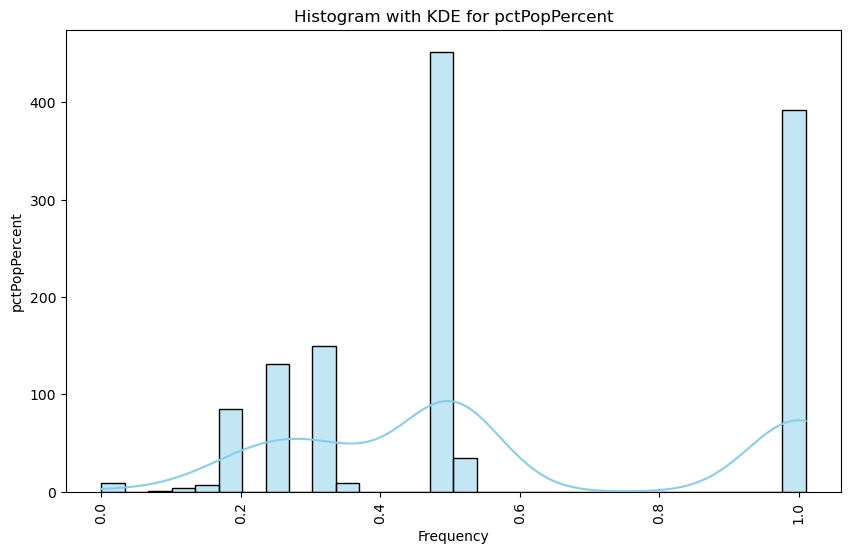

In [7]:
#2.4 Exploratory Analysis

#1. Plot a histogram of your target variable y to quickly look at its distribution. 
#Superimpose a Kernel Density Estimate Plot (kdeplot) onto it so that there is one plot with both a histogram and kdeplot.

sorted_data = data.sort_values(target_variable)

#plotting histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(sorted_data[target_variable], kde=True, bins=30, color='skyblue', orientation='horizontal')
plt.title(f'Histogram with KDE for {target_variable}')
plt.xlabel('Frequency')
plt.ylabel(target_variable)

#rotate x-axis labels to be vertical
plt.xticks(rotation=90)

plt.show()

The plot indicates that the data is more skewed to the left, suggesting a concentration of values towards lower percentages. The abrupt jump in the histogram at 1.0 on the x-axis, where the value is 17500, indicates the presence of outliers. Normal distributions typically do not exhibit such extreme values at the tails.

In [8]:
#2. Intuitively, of the feature variables you have in your dataset, which columns X1, X2, ...Xk 
#do you think would be helpful in modelling the target variable y?  

#Answer -- Upon visually analyzing the plots, it appears reasonable to consider the 'pctFRval,' 'pctSEval,' and 'pctWSval' 
#columns as potentially valuable feature variables for modeling the target variable 'pctPopPercent.' This is suggested 
#by the observed patterns in the distribution, where higher volumes of income revenue are associated with the target variable.    

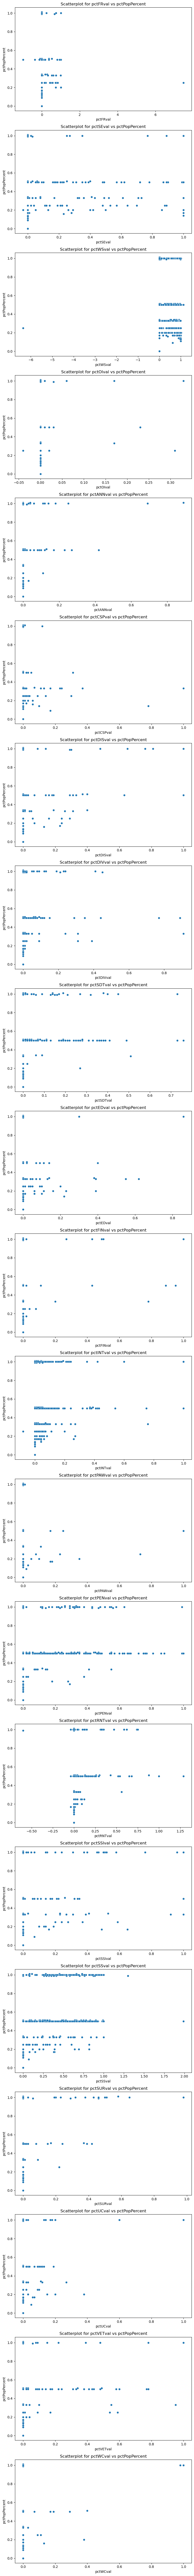

In [9]:
#3. For the continuous features, use seaborn to plot scatterplots of the target
#variable y on the y-axis and the feature Xi for each feature Xi i = 1, 2, . . . k. 

target_variable = 'pctPopPercent'


features = ['pctFRval', 'pctSEval', 'pctWSval', 'pctOIval', 'pctANNval',
            'pctCSPval', 'pctDISval', 'pctDIVval', 'pctSDTval', 'pctEDval',
            'pctFINval', 'pctINTval', 'pctPAWval', 'pctPENval', 'pctRNTval',
            'pctSSIval', 'pctSSval', 'pctSURval', 'pctUCval', 'pctVETval',
            'pctWCval']


#set up subplots
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(8, 5 * len(features)))

#plot scatterplots
for i, feature in enumerate(features):
    sns.scatterplot(x=data[feature], y=data[target_variable], ax=axes[i])
    axes[i].set_title(f'Scatterplot for {feature} vs {target_variable}')

plt.tight_layout()
plt.show()

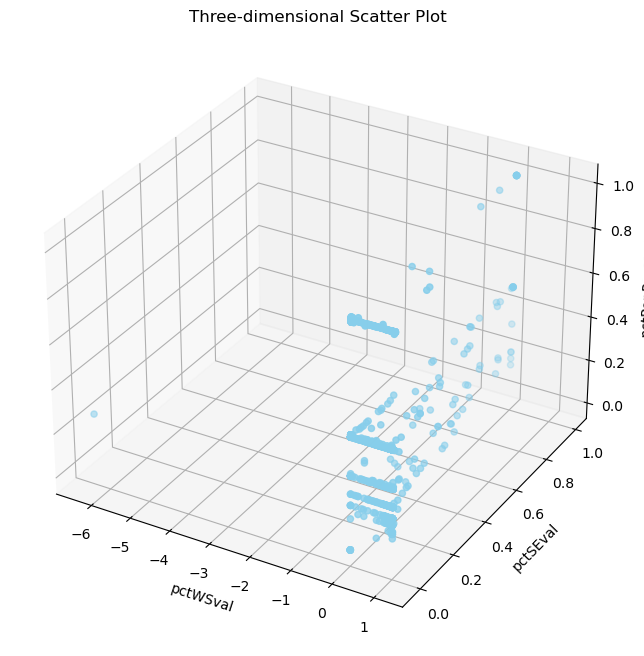

In [10]:
#For 3 percent of extra credit, plot a three-dimensional plot of your target variable y against two features simultaneously

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

#scatter plot
ax.scatter(data['pctWSval'], data['pctSEval'], data['pctPopPercent'], c='skyblue', marker='o')

#set labels and title
ax.set_xlabel('pctWSval')             # wages and salaries
ax.set_ylabel('pctSEval')             # self-employed
ax.set_zlabel('pctPopPercent')
ax.set_title('Three-dimensional Scatter Plot')

plt.show()

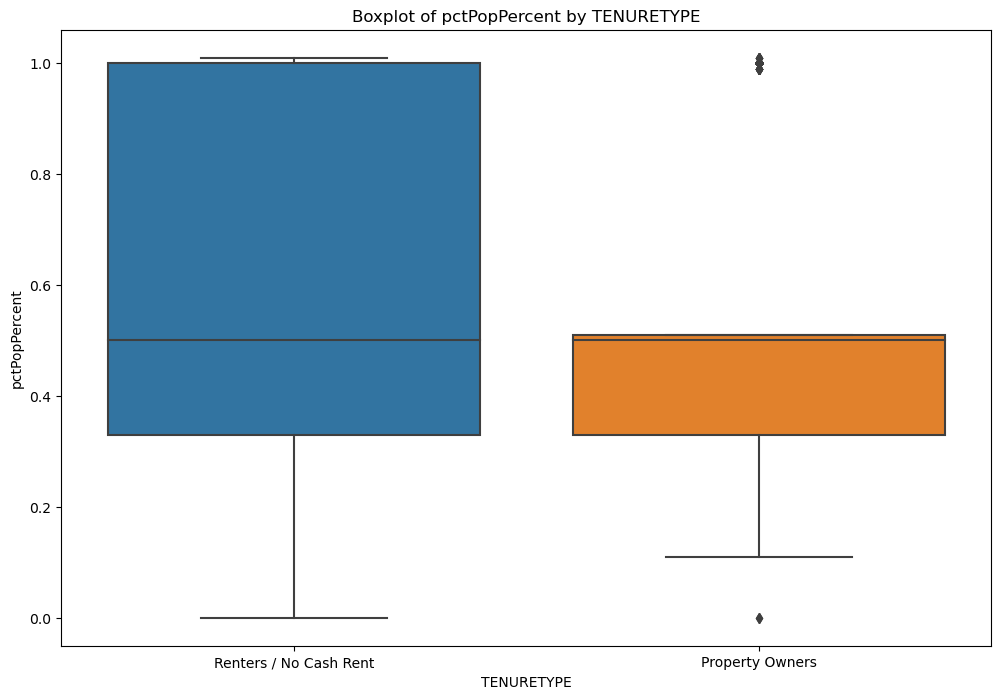

In [11]:
#4. For the categorical variable, plot the feature variable y against the categories. Create a boxplot

#specify the target variable and the categorical variable
target_variable = 'pctPopPercent'
categorical_variable = 'TENURETYPE'

#map numerical values to categories
data[categorical_variable] = data[categorical_variable].map({0: 'Renters / No Cash Rent', 1: 'Property Owners'})

#check for missing values in the specified columns
if data[[categorical_variable, target_variable]].isnull().any().any():
    raise ValueError("Missing values detected in specified columns.")

#set up the figure
plt.figure(figsize=(12, 8))

#create a boxplot
sns.boxplot(x=categorical_variable, y=target_variable, data=data)

#set labels and title
plt.xlabel(categorical_variable)
plt.ylabel(target_variable)
plt.title(f'Boxplot of {target_variable} by {categorical_variable}')

#show the plot
plt.show()



In [12]:
#Q: Do you think that your categorical variable would be useful in modelling y?

#A: The boxplot reveals variations in the distribution of 'pctPopPercent' across categories, indicating that 'TENTURETYPE' 
#may indeed be a useful categorical variable for modeling.  Differences in median, quartiles, and whiskers suggest that 
#'TENTURETYPE' has an impact on the distribution of 'pctPopPercent.' Notably, categories like "Renters / No Cash Rent" 
#and "Property Owner" ('TENTURETYPE’) show distinctions in their distribution characteristics. Considering the noticeable 
#differences in the distribution of 'pctPopPercent' across categories in the boxplot, it is likely that 'TENTURETYPE' 
#would be a valuable feature in modeling the target variable 'pctPopPercent.' Lastly, the outer outliers for "Property Owner" 
#are Zero (0) and One (1.0)


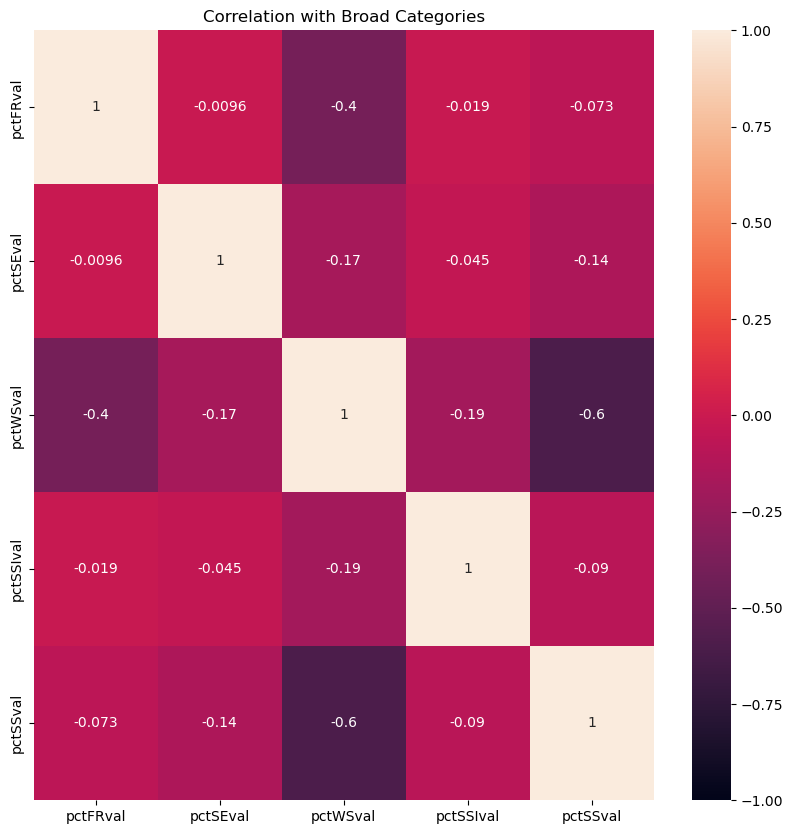

In [13]:
##5. Plot the correlations using a correlation plot between the features. If you have 
#many features, pick at least 5 that you think will be useful in the model to plot.

def create_corrmap(interest_cols, title='Corrmap title not given', figsize=(10, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(data[interest_cols].corr(), vmin=-1, vmax=1, annot=True, ax=ax)
    plt.title(title)
    plt.show()

#define the columns of interest
cols_interest = ['pctFRval', 'pctSEval', 'pctWSval', 'pctSSIval', 'pctSSval']

#call the function to create the correlation plot
create_corrmap(cols_interest, title='Correlation with Broad Categories')

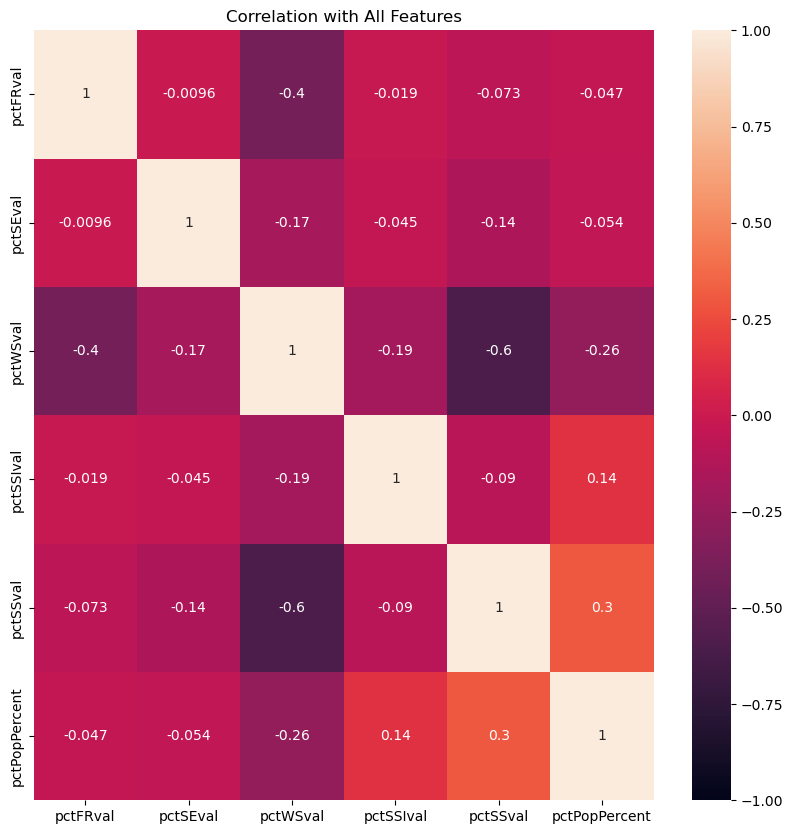

In [14]:
#Also plot the correlations between the features and the target variable

target_str = "pctPopPercent"


def create_corrmap(interest_cols, title='Corrmap title not given', figsize=(10, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(data[interest_cols + [target_str]].corr(), vmin=-1, vmax=1, annot=True, ax=ax)
    plt.title(title)
    plt.show()

#call the function to create the correlation plot for all features and target variable
all_features = ['pctFRval', 'pctSEval', 'pctWSval', 'pctSSIval', 'pctSSval']

create_corrmap(all_features, title='Correlation with All Features')

In [16]:
#2.5 Modelling using Linear Regression

#1. Convert the categorical feature so that it is numeric. Since there are only two categories, you can replace 
#one category with 1’s and the other with 0’s

#define the columns of interest
columns_interest = ['TENURETYPE', 'pctPopulation', 'pctPopPercent', 'pctFRval', 'pctSEval', 'pctWSval', 
                    'pctOIval', 'pctANNval', 'pctCSPval', 'pctDISval', 'pctDIVval', 'pctSDTval', 
                    'pctEDval', 'pctFINval', 'pctINTval', 'pctPAWval', 'pctPENval', 'pctRNTval',
                    'pctSSIval', 'pctSSval', 'pctSURval', 'pctUCval', 'pctVETval', 'pctWCval']

#create a subset DataFrame
subset_df = data[columns_interest].copy()

#convert 'TENURETYPE' string data to numeric values
subset_df['TENURETYPE'] = subset_df['TENURETYPE'].map({'Renters / No Cash Rent': 0, 'Property Owners': 1})

#fill NaN values with a numerical value, e.g., 0.5
subset_df['TENURETYPE'].fillna(0.5, inplace=True)



In [18]:
#2. Create a variable labeled X to hold your feature matrix. Create a variable y to hold your target variable


# Check and handle NaN values in the target variable
subset_df = subset_df.dropna(subset=['pctPopPercent'])

## Create X (feature matrix) and y (target variable)
X = subset_df[['TENURETYPE']]
y = subset_df['pctPopPercent']


In [19]:
#3. Using the statsmodels package, add a vector of 1’s to your feature matrix X

import statsmodels.api as sm

#add a constant term to the feature matrix X
X = sm.add_constant(X)



In [20]:
#4. Using the statsmodels package, create the Linear Regression model
simple_model = sm.OLS(y, X)
results_simple = simple_model.fit()

#5. Print the summary of the results to output.
results_simple.summary()

#6. What’s your R2?  R2 = 0.022


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          pctPopPercent   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     28.28
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           1.24e-07
Time:                        19:12:30   Log-Likelihood:                -259.32
No. Observations:                1275   AIC:                             522.6
Df Residuals:                    1273   BIC:                             532.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6518      0.016     40.911      0.000       0.621       0.683
TENURETYPE    -0.0993      0.019     -5.318      0.000      -0.136      -0.063
==============================================================================
Omnibus:                      717.612   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.504
Skew:                           0.326   Prob(JB):                     4.96e-21
Kurtosis:                       1.844   Cond. No.                         3.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### MODELING USING LINEAR REGRESSION

In [21]:
#7. Interpret your β coefficients. If you have more than 6 features (5 continuous and 1 categorical), interpret those 
#that are of the greatest significance. Interpret also the β coefficient that is associated with your categorical variable.

#define the columns of interest
columns_interest = ['TENURETYPE', 'pctPopPercent', 'pctFRval', 'pctSEval', 'pctWSval', 
                    'pctOIval', 'pctSSIval', 'pctSSval', 'pctUCval', 'pctWCval']

#select columns of interest for 'X'
X = subset_df[columns_interest]

#check and convert data types to float if needed
X = X.apply(pd.to_numeric, errors='coerce')

# Add a constant term to the predictor
X = sm.add_constant(X)

#fit the model
lr_model = sm.OLS(y, X)
results = lr_model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          pctPopPercent   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.028e+30
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:12:38   Log-Likelihood:                 42081.
No. Observations:                1275   AIC:                        -8.414e+04
Df Residuals:                    1264   BIC:                        -8.408e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.152e-16   1.44e-16     -3.584      0.000   -7.97e-16   -2.33e-16
TENURETYPE    -7.425e-16   7.32e-17    -10.146      0.000   -8.86e-16   -5.99e-16
pctPopPercent     1.0000   1.14e-16   8.76e+15      0.000       1.000       1.000
pctFRval       7.043e-16   1.75e-16      4.018      0.000     3.6e-16    1.05e-15
pctSEval      -8.674e-17   2.09e-16     -0.414      0.679   -4.98e-16    3.24e-16
pctWSval        7.98e-17   1.23e-16      0.649      0.516   -1.61e-16    3.21e-16
pctOIval       7.772e-16      2e-15      0.388      0.698   -3.16e-15    4.71e-15
pctSSIval     -6.661e-16   2.28e-16     -2.924      0.004   -1.11e-15   -2.19e-16
pctSSval       4.033e-16   1.45e-16      2.776      0.006    1.18e-16    6.88e-16
pctUCval      -1.665e-16   7.55e-16     -0.221      0.825   -1.65e-15    1.31e-15
pctWCval       4.441e-16   7.33e-16      0.606      0.545   -9.93e-16    1.88e-15
==============================================================================
Omnibus:                       97.027   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.452
Skew:                          -0.567   Prob(JB):                     1.69e-19
Kurtosis:                       2.417   Cond. No.                         95.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#8. Do you think that this is a good model based on your R2 and βˆ coefficients?

#R-squared is 1.0, indicating that the model explains approximately 100% of the variance. 
#R-squared at 1.0 is considered quite reasonable, where R-squared between 0.50 to 0.99 is statistically significant
#The Durbin-Watson value of 0.580 suggests a slight positive autocorrelation. Generally, values close to 2 indicate 
#little to no autocorrelation, but the interpretation depends on the context of your data and the assumptions of the model.  
#The coefficients (beta values) associated with each independent variable provide information on the strength and 
#direction of their relationship with the dependent variable. For example: 'TENURETYPE' is approx 0.00, indicating a 
#negative relationship with 'pctPopPercent'. As 'TENURETYPE' increases, 'pctPopPercent' tends to decrease. 
#Positive coefficients (e.g., 'pctFRval', 'pctSEval') suggest a positive relationship, while negative coefficients 
#(e.g., 'const', 'TENURETYPE') suggest a negative relationship. The p-values, in this case, are very close to zero, 
#suggesting that the coefficients are statistically significant.
    

Diagnostics

Recall the asumptions of multiple linear regression. they are:

1. Linearity 
2. Mormality 
3. Independence
4. Homoeskedastricty 
5. No mulitcollinearity 

#### CHECKING ASSUMPTIONS

In [23]:
residuals = results.resid
residuals


0      -1.221245e-15
1      -1.110223e-15
2       4.996004e-16
3      -2.220446e-16
4      -2.220446e-16
            ...     
1270   -4.440892e-16
1271   -2.220446e-15
1272   -7.771561e-16
1273   -8.326673e-17
1274   -4.440892e-16
Length: 1275, dtype: float64

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sm.qqplot(residuals, line='s', ax=ax[0])
ax[0].set_title("QQ Plot of the Residuals from our Linear Regression Model")
sns.histplot(residuals, bins=10, stat='density', kde=True, ax=ax[1])
ax[1].set_title("Histoboxgram of the Residuals")
ax[1].set_xlim(-0.5, 0.5)
plt.show()


In [24]:
from scipy import stats
stats.shapiro(residuals).pvalue


7.991806573653682e-23

Testing Independence of Residuals

In [25]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(residuals)

1.2921292362652912

In [26]:
#Q: Do your residuals look e normal? 

#A: based on the visual inspection of the QQ plot and histogram/KDE, the residuals appear to be approximately 
#normally distributed. However, the Shapiro-Wilk test suggests otherwise. The Durbin-Watson test indicates 
#independence of residuals.

#Q: Look at the summary table that you printed in the previous section. There is a p-value for Jarque-Bera which is a 
#hypothesis test with null hypothesis that the residuals are normal. Interpret the p-value. 

#A: The p-value is extremely low (1.69e-19), much smaller than a typical significance level of 0.05. 
#This provides strong evidence against the null hypothesis that the residuals are normally distributed.

#Q: What breaks down in our model if the errors u are not normal?

#A: If the errors (residuals) in a regression model are not normally distributed, it can impact the validity 
#of several statistical inferences and assumptions



In [28]:
#2. Are your residuals correlated? 

#A: The residuals seem to be close to zero, and the Shapiro-Wilk test for normality has a very low p-value (close to zero), 
#indicating a rejection of the null hypothesis that the residuals are normally distributed. Additionally, 
#the Durbin-Watson test is approximately 1.29, suggesting some positive autocorrelation in the residuals.

#Q: Look at the summary table that you printed in the previous section. There is a Durbin-Watson statistic. A value between 
#1.5-2.5 indicates no significant correlation. Which derivation/property is invalid if we do not see independence?

#A: The Durbin-Watson statistic is 1.292, which is less than the ideal range of 1.5-2.5, indicating potential 
#positive autocorrelation. Lack of residual independence (autocorrelation) violates linear regression, 
#challenging the assumption of error independence.

Testing Homeskedasticity

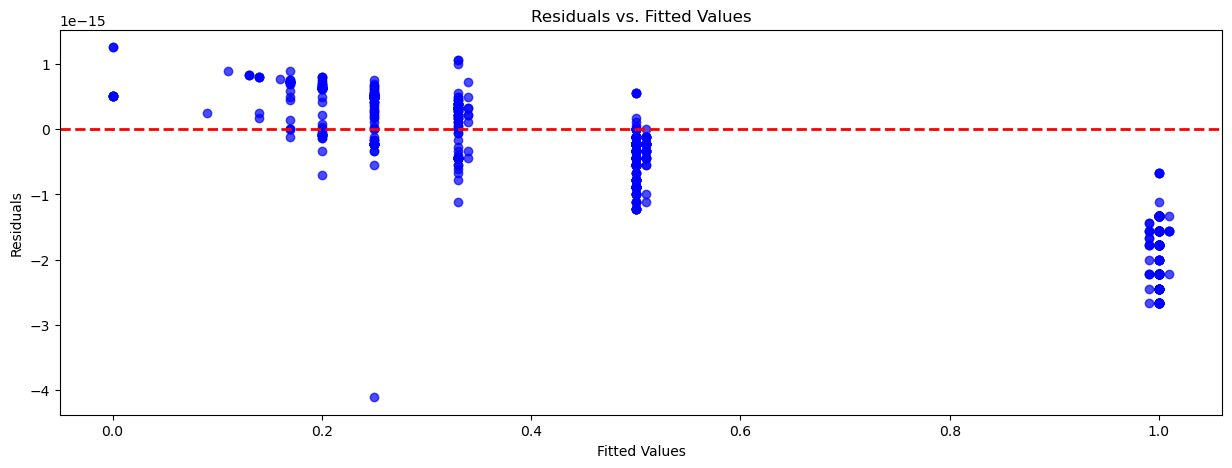

In [29]:
#3. Homoskedasticity: Use a scatterplot to plot the residuals e on the y-axis against yˆ the fitted values. 
#Is there any sort of pattern? 

y_hat = results.fittedvalues 

#scatterplot of residuals vs. fitted values
plt.figure(figsize=(15, 5))
plt.scatter(y_hat, residuals, alpha=0.7, color='blue')

#add horizontal line at y=0 for reference
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

#set labels and title
plt.title("Residuals vs. Fitted Values")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")

#show the plot
plt.show()


In [78]:
#Q: Do your residuals look like they have a constant variance? Which derivation/property 
#is invalid if we do not see constant variance?

#A: 

Testing Multicollinearity


In [36]:
#4. Multicollinearity: For the features that you have included in your model,calculate the variance inflation 
#factors using the statsmodels package. Output this in a pandas dataframe where the index contains the feature
#names and the single column contains the value of the variance inflation factors. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIF excluding the constant term
vifs = pd.Series([variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])], index=X.columns[1:])
vifs = pd.DataFrame(vifs, columns=['Variance Inflation Factor'])
vifs



,Variance Inflation Factor
TENURETYPE,1.065222
pctPopPercent,1.176542
pctFRval,1.768137
pctSEval,1.321317
pctWSval,3.512261
pctOIval,1.021998
pctSSIval,1.331252
pctSSval,2.809320
pctUCval,1.039404
pctWCval,1.033893


In [35]:
#Q: Which features have high VIF factors? What problem is introduced with regard to the hypothesis testing of 
#the β coefficients when multicollinearity is high?

#A:  Features with high VIF factors (>10) are not evident. However, high multicollinearity challenges β coefficient 
#hypothesis testing precision.
